In [22]:
import tensorflow as tf
from segmentation_models import Unet, Linknet, PSPNet, FPN
import segmentation_models as sm
from keras.utils import plot_model
import albumentations as A
import numpy as np
from numpy import savez_compressed,savez
from numpy import load
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# https://github.com/qubvel/segmentation_models
# https://segmentation-models.readthedocs.io/en/latest/tutorial.html

In [3]:
model1 = Unet('resnet34',input_shape=(256, 256, 3),classes=1, activation='sigmoid',encoder_weights=None)
model1.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])
#model1.summary()

In [4]:
model2 = Unet('resnet50',input_shape=(256, 256, 3),classes=1, activation='sigmoid',encoder_weights=None)
model2.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])
#model2.summary()

In [5]:
model3 = Unet('vgg16',input_shape=(256, 256, 3),classes=1, activation='sigmoid',encoder_weights=None)
model3.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])
#model3.summary()

In [6]:
model4 = Unet('vgg19',input_shape=(256, 256, 3),classes=1, activation='sigmoid',encoder_weights=None)
model4.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])
#model4.summary()

In [7]:
model5 = Unet('inceptionv3',input_shape=(256, 256, 3),classes=1, activation='sigmoid',encoder_weights=None)
model5.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])
#model5.summary()

In [8]:
#plot_model(model5,show_shapes=True)

In [9]:
#plot_model(model2,show_shapes=True,to_file="unet_resnet50.png",dpi=200)

In [10]:
data = load('E:/carto_training_256_clean.npz')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data['arr_0'], data['arr_1'], test_size=0.10, random_state=123)

In [12]:
print(X_train.shape)

(394, 256, 256, 3)


In [13]:
print(X_test.shape)

(44, 256, 256, 3)


In [14]:
# Vertical Flip
transform1 = A.Compose([A.VerticalFlip(p=1)])
vflip_images = []
vflip_labels = []
for i in range(0,len(X_train)):
    transformed1 = transform1(image=X_train[i], mask=y_train[i])
    vflip_images.append(transformed1['image'])
    vflip_labels.append(transformed1['mask']) 

#%% Horizontal Flip
transform2 = A.Compose([A.HorizontalFlip(p=1)])
hflip_images = []
hflip_labels = []
for i in range(0,len(X_train)):
    transformed2 = transform2(image=X_train[i], mask=y_train[i])
    hflip_images.append(transformed2['image'])
    hflip_labels.append(transformed2['mask'])

#%% Transpose
transform3 = A.Compose([A.Transpose(p=1)])
tp_images = []
tp_labels = []
for i in range(0,len(X_train)):
    transformed3 = transform3(image=X_train[i], mask=y_train[i])
    tp_images.append(transformed3['image'])
    tp_labels.append(transformed3['mask']) 

#%% #ShiftScaleRotate 
transform4 = A.Compose([A.ShiftScaleRotate(p=1)])
ssr_images = []
ssr_labels = []
for i in range(0,len(X_train)):
    transformed4 = transform4(image=X_train[i], mask=y_train[i])
    ssr_images.append(transformed4['image'])
    ssr_labels.append(transformed4['mask'])

#%% #RandomFog 
transform5 = A.Compose([A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=1, alpha_coef=0.2, always_apply=True, p=1)])
fog_images = []
fog_labels = []
for i in range(0,len(X_train)):
    transformed5 = transform5(image=X_train[i], mask=y_train[i])
    fog_images.append(transformed5['image'])
    fog_labels.append(transformed5['mask'])
    
#%% #Rotate90 
transform6 = A.Compose([A.SafeRotate(limit=90, p=1)])
t90_images = []
t90_labels = []
for i in range(0,len(X_train)):
    transformed6 = transform6(image=X_train[i], mask=y_train[i])
    t90_images.append(transformed6['image'])
    t90_labels.append(transformed6['mask'])
    
#%% #Rotate180 
transform7 = A.Compose([A.SafeRotate(limit=180, p=1)])
t180_images = []
t180_labels = []
for i in range(0,len(X_train)):
    transformed7 = transform7(image=X_train[i], mask=y_train[i])
    t180_images.append(transformed7['image'])
    t180_labels.append(transformed7['mask'])

#%% #Rotate=270 
transform8 = A.Compose([A.SafeRotate(limit=270, p=1)])
t270_images = []
t270_labels = []
for i in range(0,len(X_train)):
    transformed8 = transform8(image=X_train[i], mask=y_train[i])
    t270_images.append(transformed8['image'])
    t270_labels.append(transformed8['mask'])

#%% #Rotate360
transform9 = A.Compose([A.SafeRotate(limit=360, p=1)])
t360_images = []
t360_labels = []
for i in range(0,len(X_train)):
    transformed9 = transform9(image=X_train[i], mask=y_train[i])
    t360_images.append(transformed9['image'])
    t360_labels.append(transformed9['mask'])

In [26]:
n_transformations = 5 + 1
def plot_images(num):
    plt.figure(figsize=(10,20))
    plt.suptitle('Augmentations')
    
    plt.subplot(2,n_transformations,1)
    plt.imshow(y_train[num],cmap="gray")
    plt.title('Actual Boundaries')
    
    plt.subplot(2,n_transformations,2)
    plt.imshow(hflip_labels[num],cmap="gray")
    plt.title('HorizontalFlip')
    
    plt.subplot(2,n_transformations,3)
    plt.imshow(tp_labels[num],cmap="gray")
    plt.title('Transpose')
    
    plt.subplot(2,n_transformations,4)
    plt.imshow(vflip_labels[num],cmap="gray")
    plt.title('VerticalFlip')
    
    plt.subplot(2,n_transformations,5)
    plt.imshow(ssr_labels[num],cmap="gray")
    plt.title('Shift Scale Rotate')
    
    plt.subplot(2,n_transformations,6)
    plt.imshow(fog_labels[num],cmap="gray")
    plt.title('Random Fog')
    
    plt.subplot(2,n_transformations,7)
    plt.imshow(X_train[num])
    plt.title('Cartosat-2 Image')
    
    plt.subplot(2,n_transformations,8)
    plt.imshow(hflip_images[num])
    plt.title('HorizontalFlip')
    
    plt.subplot(2,n_transformations,9)
    plt.imshow(tp_images[num])
    plt.title('Transpose')
    
    plt.subplot(2,n_transformations,10)
    plt.imshow(vflip_images[num],cmap="gray")
    plt.title('VerticalFlip')
    
    plt.subplot(2,n_transformations,11)
    plt.imshow(ssr_images[num],cmap="gray")
    plt.title('Shift Scale Rotate')
    
    plt.subplot(2,n_transformations,12)
    plt.imshow(fog_images[num],cmap="gray")
    plt.title('Random Fog')
    
    
    plt.show() 

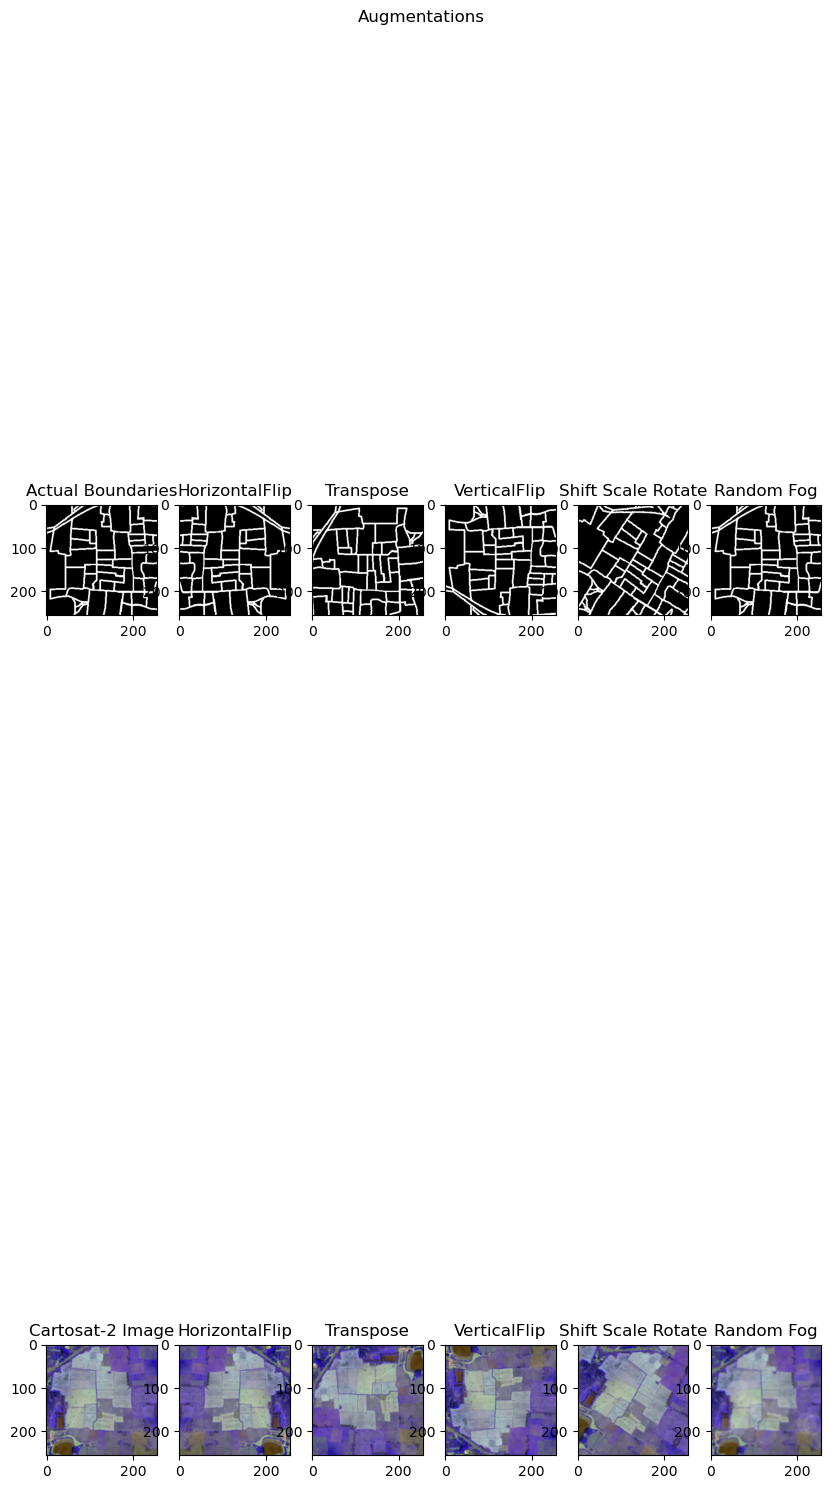

In [27]:
plot_images(10)

In [28]:
n_transformations = 4 + 1
def plot_rotate_images(num):
    plt.figure(figsize=(10,20))
    plt.suptitle('Augmentations')
    
    plt.subplot(2,n_transformations,1)
    plt.imshow(y_train[num],cmap="gray")
    plt.title('Actual Boundaries')
    
    plt.subplot(2,n_transformations,2)
    plt.imshow(t90_labels[num],cmap="gray")
    plt.title('T90')
    
    plt.subplot(2,n_transformations,3)
    plt.imshow(t180_labels[num],cmap="gray")
    plt.title('T180')
    
    plt.subplot(2,n_transformations,4)
    plt.imshow(t270_labels[num],cmap="gray")
    plt.title('T270')
    
    plt.subplot(2,n_transformations,5)
    plt.imshow(t360_labels[num],cmap="gray")
    plt.title('T360')
    
    
    plt.subplot(2,n_transformations,6)
    plt.imshow(X_train[num])
    plt.title('Cartosat-2 Image')
    
    plt.subplot(2,n_transformations,7)
    plt.imshow(t90_images[num])
    plt.title('T90')
    
    plt.subplot(2,n_transformations,8)
    plt.imshow(t180_images[num])
    plt.title('T180')
    
    plt.subplot(2,n_transformations,9)
    plt.imshow(t270_images[num],cmap="gray")
    plt.title('T270')
    
    plt.subplot(2,n_transformations,10)
    plt.imshow(t360_images[num],cmap="gray")
    plt.title('T360')
    
    plt.show() 

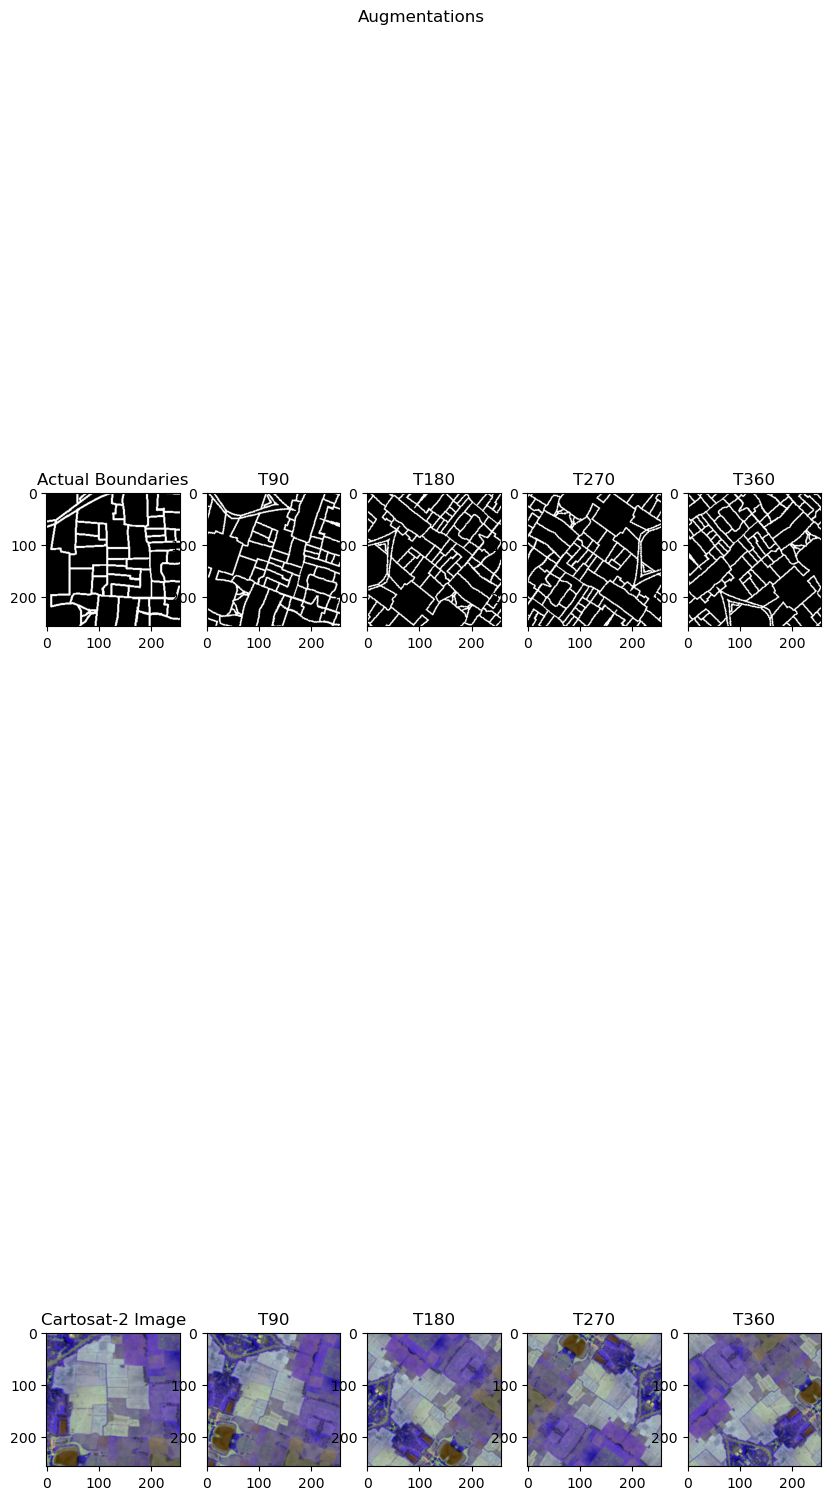

In [29]:
plot_rotate_images(10)

In [20]:
#%%
X_train_final = np.array(list(X_train) + hflip_images + vflip_images + tp_images + ssr_images + fog_images + t90_images + t180_images + t270_images + t360_images)
y_train_final = np.array(list(y_train) + hflip_labels + vflip_labels + tp_labels + ssr_labels + fog_labels + t90_labels + t180_labels + t270_labels + t360_labels)

In [31]:
results = model1.fit(X_train_final, y_train_final, validation_split=0.1, epochs=50,batch_size=32)

Train on 3546 samples, validate on 394 samples
Epoch 1/50


ResourceExhaustedError:  OOM when allocating tensor with shape[32,32,32,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node stage2_unit3_conv1/convolution-0-2-TransposeNCHWToNHWC-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_59518]

Function call stack:
keras_scratch_graph
